For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

Optional: Push your code and project to github.



In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
import ipy_table as tbl


In [59]:
!pip install ipy_table

  Created wheel for ipy-table: filename=ipy_table-1.15.1-py3-none-any.whl size=18767 sha256=2aeab4178e861a612306cd3d322ca3db860ca8fedeee7f4d12d9f80c5440dd95
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\28\9a\6c\235ab11c6eda0ea6dc621383e3dbbf26671fa068420ad321dc
Successfully built ipy-table


In [2]:
df= pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and Embarked have nul values. Cabin too has null data, but we'll ignore this variable as we are not using this in our analysis.

Embarked being a categorical variable fil the null values with the mode.



In [5]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df['Embarked'].fillna('S',inplace=True)

Fill the Age null values using the median value

In [7]:
# Calculate mean age on the basis of Sex and Pclass
Mean_age = df.groupby(['Sex','Pclass'])['Age'].mean()
Mean_age

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [8]:
def Fill_NA_Age(row):
    '''
    Function to check if the age is null.If yes, replace wth the mean value calculted above
    else use the actual age
    '''
    if pd.isna(row['Age']):
        return Mean_age[row['Sex'],row['Pclass']]
    else:
        return row['Age']

df['Age'] =df.apply(Fill_NA_Age, axis=1)

In [9]:
#Describing the datframe to see if null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Removing unnecessary variable from the dataset for further analysis
df.drop(['Name','Ticket','Cabin'],axis = 1, inplace = True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [12]:
# Creating Category for Numerical Age variable for analysis

bins = [0,10, 20, 30, 40,50,60,70, np.inf]
names = ['0-10', '11-20', '21-30', '31-40', '41-50','51-60','61-70','70+']

df['AgeCategory'] = pd.cut(df['Age'], bins, labels=names)


In [13]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory
0,1,0,3,male,22.0,1,0,7.2500,S,21-30
1,2,1,1,female,38.0,1,0,71.2833,C,31-40
2,3,1,3,female,26.0,0,0,7.9250,S,21-30
3,4,1,1,female,35.0,1,0,53.1000,S,31-40
4,5,0,3,male,35.0,0,0,8.0500,S,31-40


In [14]:
bins = [0, 2, 15, 50,100, np.inf]
names = ['No Fare (0)', 'Low Fare (1-15)', 'Medium Fare (15-50)', 'High Fare (50 - 100)', 'Very High Fare (100+)']

df['FareCategory'] = pd.cut(df['Fare'], bins, labels=names)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FareCategory
0,1,0,3,male,22.0,1,0,7.2500,S,21-30,Low Fare (1-15)
1,2,1,1,female,38.0,1,0,71.2833,C,31-40,High Fare (50 - 100)
2,3,1,3,female,26.0,0,0,7.9250,S,21-30,Low Fare (1-15)
3,4,1,1,female,35.0,1,0,53.1000,S,31-40,High Fare (50 - 100)
4,5,0,3,male,35.0,0,0,8.0500,S,31-40,Low Fare (1-15)


In [16]:
# Mapping id values to a meaningful description

def map_data(df):
    '''
    Function takes the dataframe and returns a updated datframe with id values mapped to description
    '''
    # survived map
    survived_map = {0: 'No', 1: 'Yes'}
    df['Survived'] = df['Survived'].map(survived_map)

    # PClass map
    pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    df['Pclass'] = df['Pclass'].map(pclass_map)

    # Embark port map
    port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
    df['Embarked'] = df['Embarked'].map(port_map)
    
    # add new column (FamilySize) to dataframe - sum of SibSp and Parch
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    return df

map_data(df)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeCategory,FareCategory,FamilySize
0,1,No,Lower Class,male,22.0,1,0,7.2500,Southampton,21-30,Low Fare (1-15),1
1,2,Yes,Upper Class,female,38.0,1,0,71.2833,Cherbourg,31-40,High Fare (50 - 100),1
2,3,Yes,Lower Class,female,26.0,0,0,7.9250,Southampton,21-30,Low Fare (1-15),0
3,4,Yes,Upper Class,female,35.0,1,0,53.1000,Southampton,31-40,High Fare (50 - 100),1
4,5,No,Lower Class,male,35.0,0,0,8.0500,Southampton,31-40,Low Fare (1-15),0


### Analyze data for the below Hypothesis
#### 1. Determine if the survival rate is associated to the class of passenger ?

H0 = Passenger Class has no impact on survival rate

HA =  Passenger Class has an impact on survival rate



In [37]:
# Count of survivors by class
pd.crosstab(df['Survived'],df['Pclass'],margins= True,margins_name='Total')

Pclass,Lower Class,Middle Class,Upper Class,Total
Survived,,,,
No,372,97,80,549
Yes,119,87,136,342
Total,491,184,216,891


In [39]:
 pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')

Pclass,Lower Class,Middle Class,Upper Class
Survived,,,
No,0.757637,0.527174,0.37037
Yes,0.242363,0.472826,0.62963


### Creating Bar Plot for Class Wise Survival

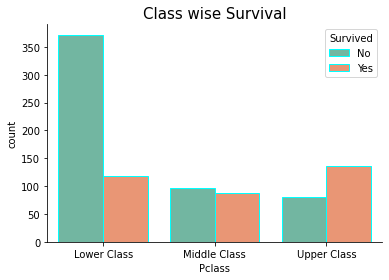

In [27]:

plot=sns.countplot(x = 'Pclass',hue = 'Survived' ,order= ('Lower Class','Middle Class','Upper Class') , 
                     hue_order= ('No','Yes'), dodge= True,palette = "Set2",
                     edgecolor=(0,1,1),linewidth=1,orient = 'h'
                     ,data = df).set_title('Class wise Survival', size = 15)


sns.despine()


### Creating Stack Bar Plot for Proportion of Passengers Survived Class Wise

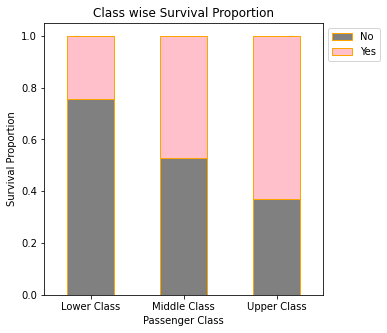

In [189]:

df_plot = pd.crosstab(df['Pclass'],df['Survived'],normalize='index')
color = ['grey','pink']
df_plot.plot(kind='bar', stacked=True, color=color,
             xlabel = 'Passenger Class',ylabel = 'Survival Proportion', title = 'Class wise Survival Proportion',
            figsize=(5, 5),edgecolor= 'orange',linewidth=1)
plt.xticks(rotation = 'horizontal')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.legend(bbox_to_anchor = (1,1))
plt.show()


The above charts represents Survival rate is maximum for the upper class and lowest for the Lower Class passenger

In [86]:
from scipy import stats
class_surv= pd.crosstab(df['Survived'],df['Pclass'])
chi2, p_val, dof, ex = stats.chi2_contingency(class_surv)


results = [['Name','Value'],
           ['Chi-Square Test',chi2],
           ['P-Value', '%.3e' %(p_val)],
           ['Degree Of Freedom', dof]]
tbl.make_table(results)



Name,Value
Chi-Square Test,102.8890
P-Value,4.549e-23
Degree Of Freedom,2


p value is less than 0.05 hence we can reject the null hypothesis. The Chi Square test p value indicates that Passenger class is correlated with Passenger Survived, sam eis evident form the above graph as well

#### 2. Determine if the survival rate is associated to the gender

H0 = Gender has no impact on survival rate

HA =  Gender has an impact on survival rate


In [88]:
# Count of survivors by class
pd.crosstab(df['Survived'],df['Sex'],margins= True,margins_name='Total')

Sex,female,male,Total
Survived,,,
No,81,468,549
Yes,233,109,342
Total,314,577,891


In [90]:
pd.crosstab(df['Survived'],df['Sex'],normalize = 'columns')

Sex,female,male
Survived,,
No,0.257962,0.811092
Yes,0.742038,0.188908


#### Creating Bar Plot for Gender Wise Survival

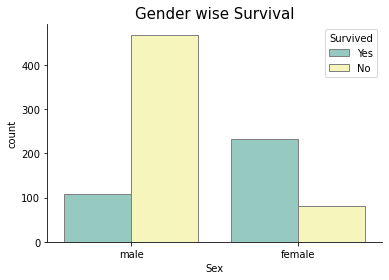

In [121]:
plot=sns.countplot(x = 'Sex',hue = 'Survived' ,order= ('male','female') , 
                     hue_order= ('Yes','No'), dodge= True,palette = "Set3",
                     edgecolor=('grey'),linewidth=1,orient = 'h'
                     ,data = df).set_title('Gender wise Survival', size = 15)


sns.despine()

### Creating Stack Bar Plot for Proportion of Passengers Survived Gender Wise


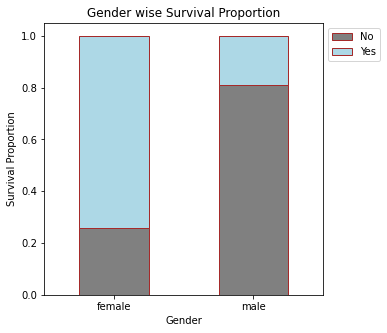

In [186]:
df_plot = pd.crosstab(df['Sex'],df['Survived'],normalize='index')
color = ['grey','lightblue']
df_plot.plot(kind='bar', stacked=True, color=color,
             xlabel = 'Gender',ylabel = 'Survival Proportion', title = 'Gender wise Survival Proportion',
            figsize=(5, 5),edgecolor= 'brown',linewidth=1)
plt.xticks(rotation = 'horizontal')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.legend(bbox_to_anchor = (1,1))
plt.show()


The above charts represents Survival rate is high for female passengers and low for Male passenger

In [122]:
sex_surv= pd.crosstab(df['Survived'],df['Sex'])
chi2, p_val, dof, ex = stats.chi2_contingency(sex_surv)


results = [['Name','Value'],
           ['Chi-Square Test',chi2],
           ['P-Value', '%.3e' %(p_val)],
           ['Degree Of Freedom', dof]]
tbl.make_table(results)

Name,Value
Chi-Square Test,260.7170
P-Value,1.197e-58
Degree Of Freedom,1


p value is less than 0.05 hence we can reject the null hypothesis. The Chi Square test p value indicates that Gender is correlated with Passenger Survived, same is evident form the above graph as well

#### 3. Determine the survival rate is associated to the age

H0 = Age has no influence on survival rate

HA =  Age has an influence on survival rate


In [148]:
df['AgeCategory'].value_counts().sort_index()

0-10      64
11-20    115
21-30    368
31-40    173
41-50    107
51-60     42
61-70     17
70+        5
Name: AgeCategory, dtype: int64

In [150]:
df.groupby(['AgeCategory','Survived']).size()

AgeCategory  Survived
0-10         No           26
             Yes          38
11-20        No           71
             Yes          44
21-30        No          248
             Yes         120
31-40        No           93
             Yes          80
41-50        No           69
             Yes          38
51-60        No           25
             Yes          17
61-70        No           13
             Yes           4
70+          No            4
             Yes           1
dtype: int64

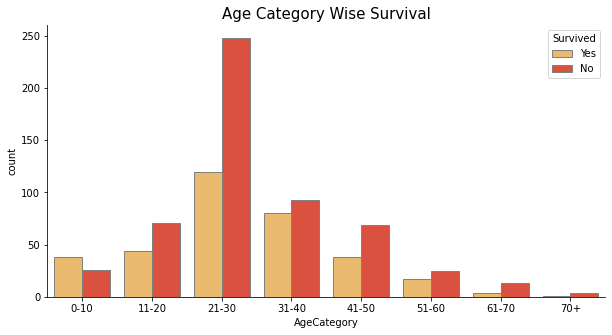

In [163]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x = 'AgeCategory',hue = 'Survived' , 
                     hue_order= ('Yes','No'), dodge= True,palette = "YlOrRd",
                     edgecolor=('grey'),linewidth=1,orient = 'h',
                     data = df).set_title('Age Category Wise Survival', size = 15)

sns.despine()

#### Creating Stack bar chart for Age Catgory Wise Survival

In [164]:
pd.crosstab(df['AgeCategory'],df['Survived'],normalize='index')

Survived,No,Yes
AgeCategory,,
0-10,0.406250,0.593750
11-20,0.617391,0.382609
21-30,0.673913,0.326087
31-40,0.537572,0.462428
41-50,0.644860,0.355140
51-60,0.595238,0.404762
61-70,0.764706,0.235294
70+,0.800000,0.200000


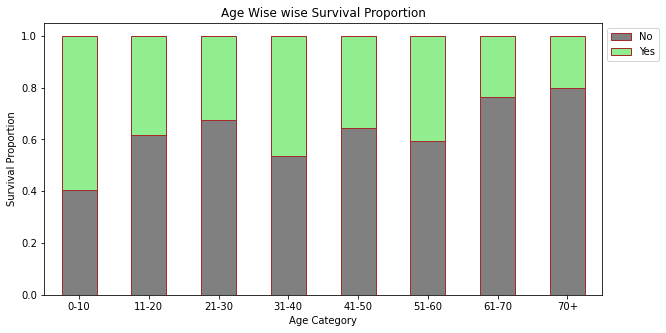

In [184]:
df_plot = pd.crosstab(df['AgeCategory'],df['Survived'],normalize='index')
color = ['grey','lightgreen']
df_plot.plot(kind='bar', stacked=True, color=color,
             xlabel = 'Age Category',ylabel = 'Survival Proportion', title = 'Age Wise wise Survival Proportion',
            figsize=(10, 5),edgecolor= 'brown',linewidth=1)
plt.xticks(rotation = 'horizontal')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.legend(bbox_to_anchor = (1,1))
plt.show()


Survival rate is comparatively better for passengers under the age of 10

In [179]:
age_surv= pd.crosstab(df['Survived'],df['AgeCategory'])
chi2, p_val, dof, ex = stats.chi2_contingency(age_surv)


results = [['Name','Value'],
           ['Chi-Square Test',chi2],
           ['P-Value', '%.5f' %(p_val)],
           ['Degree Of Freedom', dof]]
tbl.make_table(results)

Name,Value
Chi-Square Test,24.3827
P-Value,0.00098
Degree Of Freedom,7


p value is less than 0.05 hence we can reject the null hypothesis. The Chi Square test p value indicates that Age is correlated with Passenger Survived, same is evident form the above graph as well

## Appendix - Additional Charts for Practice

In [181]:
df[['Age','Fare']].corr()  

,Age,Fare
Age,1.000000,0.118308
Fare,0.118308,1.000000


In [183]:
df_new= pd.read_csv("titanic.csv")
df_new.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

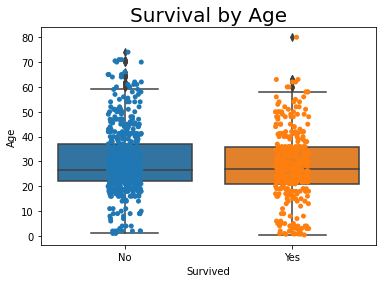

In [173]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=df)
ax = sns.stripplot(x="Survived", y="Age",
                   data=df, jitter=True,
                   edgecolor="gray").set_title("Survival by Age",fontsize=20);

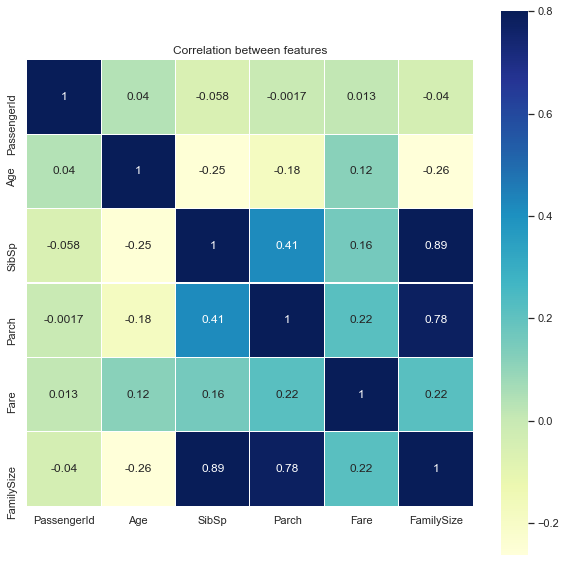

In [70]:
corr=df.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');